# Mort Subite

## I. Mise en forme de la base de données et chargement des packages

In [1]:
!pip install tslearn
!pip install h5py
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 7.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 24.4 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tslearn.metrics import dtw
from tslearn.clustering import TimeSeriesKMeans

Nous allons étudier la mort subite.


D'abord, importons nos packages et ouvrons les bases de données

In [3]:
Table_Pop = pd.read_csv('MSTP.csv', sep = ';') #Je réimporte à chaque fois en local la base de données. Je ne stocke pas sur Git car données sensibles 
bd0 = pd.read_csv('MS_BD0.csv', sep = ';', parse_dates=[1])
bd1 = pd.read_csv('MS_BD1.csv', sep = ';', parse_dates=[1])
bd2 = pd.read_csv('MS_BD2.csv', sep = ';', parse_dates=[1])

/tmp/ipykernel_184/3886420623.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bd0 = pd.read_csv('MS_BD0.csv', sep = ';', parse_dates=[1])
/tmp/ipykernel_184/3886420623.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bd1 = pd.read_csv('MS_BD1.csv', sep = ';', parse_dates=[1])
/tmp/ipykernel_184/3886420623.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bd2 = pd.read_csv('MS_BD2.csv', sep = ';', parse_dates=[1])


Je vais concaténer les traitements. 

In [4]:
bdtot = pd.concat([bd0, bd1, bd2])

On va établir une liste des enquêtés pour pouvoir compter leurs soins à l'avenir

In [5]:
list_enq = [] #On crée une liste vide
for elem in Table_Pop['NUM_ENQ']:
    list_enq.append(str(elem))#On ajoute chaque numéro d'enquêté, présent une seule fois sur la table de population

Maintenant, on va chercher à compter combien d'actes de soins ont été reçus par enquêtés. Pour ce faire, nous allons compter les occurences de chaque éléments de la liste dans la base de données totale. On va les implémenter dans la Table Pop ensuite. 

In [ ]:
#Création d'un début de dataframe pour remplir boucle
ar = np.array([0, 0]) #Première ligne arbitraire
Nb_Soins = pd.DataFrame(ar) #Conversion de la matrice en DataFrame
Nb_Soins = Nb_Soins.transpose()
Nb_Soins.columns = ['NUM_ENQ', 'NB_SOIN'] #On nomme les colonnes'''
 
#On va maintenant chercher à associer à chaque enquêté le nombre de soin reçu.
#Calcul des soins par personnes et création d'une dataframe qui associe au numéro le nombre de soin
for elem in list_enq:
    c = 0 #Ce sera notre compteur d'itération
    for val in bdtot['NUM_ENQ']:
        if elem==val:
            c = c+1
    ar_temp = np.array([elem, c])
    df_temp = pd.DataFrame(ar_temp)
    df_temp = df_temp.transpose()
    df_temp.columns = ['NUM_ENQ', 'NB_SOIN']
    Nb_Soins = pd.concat([Nb_Soins, df_temp])

Nb_Soins

,NUM_ENQ,NB_SOIN
0,0,0
0,G0-9994,1023
0,G0-998,512
0,G0-9977,0
0,G0-9973,12
...,...,...
0,G0-10019,1
0,G0-10018,1
0,G0-10008,8
0,G0-10004,354


In [ ]:
#on retire la ligne 0 
Nb_Soins_c = Nb_Soins.copy()
Nb_Soins_c = Nb_Soins_c[Nb_Soins_c['NUM_ENQ']!=0] 

In [ ]:
Table_Pop

,NUM_ENQ,GROUPE,ID_MATCHING,ANTERIORITE_DISPONIBLE,DTD_EVT,SEXE,CMU,AME,DECES,DTD_DCD,AGE,TYPE_LIEU,TEMOIN,RCP_TEMOIN,ADMIS_VIVANT_HOPITAL,RYTHME_CHOQUABLE,CORO,ANN_EVT,TYPE_ASSURANCE
0,G0-9994,mort_subite,G0-<NA>,2956.0,2014-02-04,1.0,0.0,0.0,1.0,NaN,52.452822,1.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN
1,G0-998,mort_subite,G0-<NA>,2104.0,2011-10-06,1.0,0.0,0.0,1.0,2011-10-12,54.133897,1.0,1.0,0.0,1.0,1.0,1.0,NaN,NaN
2,G0-9977,mort_subite,G0-<NA>,2950.0,2014-01-29,1.0,0.0,0.0,1.0,NaN,50.656755,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN
3,G0-9973,mort_subite,G0-<NA>,2950.0,2014-01-29,1.0,0.0,0.0,1.0,2014-01-29,31.154644,0.0,1.0,0.0,1.0,0.0,0.0,NaN,NaN
4,G0-9970,mort_subite,G0-<NA>,2947.0,2014-01-26,1.0,0.0,0.0,1.0,NaN,49.361725,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4701,G0-10019,mort_subite,G0-<NA>,2876.0,2013-11-16,1.0,0.0,0.0,1.0,2013-11-28,53.695832,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN
4702,G0-10018,mort_subite,G0-<NA>,2961.0,2014-02-09,1.0,0.0,0.0,1.0,NaN,46.040644,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN
4703,G0-10008,mort_subite,G0-<NA>,2838.0,2013-10-09,1.0,0.0,0.0,1.0,2013-10-09,53.153727,0.0,1.0,1.0,1.0,NaN,1.0,NaN,NaN
4704,G0-10004,mort_subite,G0-<NA>,2821.0,2013-09-22,0.0,1.0,0.0,1.0,NaN,48.414410,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN


In [ ]:
#L'opération ci-dessus étant très longue, on va exporter Nb_Soin pour pas avoir à refaire cette étape. On mettra sur drive la base de données
#Nb_Soins_c.to_excel('Nb_Soins.xlsx')

Nb_Soins_c.to_csv('Nb_Soins.csv')

#Ouvrir la nouvelle dataframe après ré-importation locale 
#Nb_Soins = pd.read_excel('Nb_Soins.xlsx')

In [ ]:
#On va joindre la base des soins avec la Table_Pop
Table_Pop = Table_Pop.merge(Nb_Soins_c, on='NUM_ENQ')


In [ ]:
Table_Pop['NB_SOIN'] =  Table_Pop['NB_SOIN'].astype(float)

## II. Statistiques descriptives

Ainsi, on peut commencer à effectuer quelques statistiques descriptives

In [17]:
Table_Pop.describe()

,ANTERIORITE_DISPONIBLE,SEXE,CMU,AME,DECES,AGE,TYPE_LIEU,TEMOIN,RCP_TEMOIN,ADMIS_VIVANT_HOPITAL,RYTHME_CHOQUABLE,CORO,ANN_EVT,TYPE_ASSURANCE,NB_SOIN
count,4706.000000,4706.000000,4686.000000,4686.000000,4706.000000,4706.000000,4692.000000,4642.000000,3127.000000,4706.000000,4207.000000,1893.000000,0.0,0.0,4706.000000
mean,3485.071186,0.716107,0.147461,0.018353,0.888228,43.804098,0.355712,0.657691,0.647586,0.373991,0.293558,0.505018,NaN,NaN,192.905440
std,940.866164,0.450933,0.354602,0.134237,0.315119,9.324248,0.478779,0.474534,0.477799,0.483913,0.455446,0.500107,NaN,NaN,281.604294
min,1961.000000,0.000000,0.000000,0.000000,0.000000,18.015428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,2677.000000,0.000000,0.000000,0.000000,1.000000,38.514822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,24.000000
50%,3390.000000,1.000000,0.000000,0.000000,1.000000,46.517040,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,84.500000
75%,4307.750000,1.000000,0.000000,0.000000,1.000000,51.272100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,259.750000
max,5248.000000,1.000000,1.000000,1.000000,1.000000,54.996338,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,4302.000000


On peut essayer de comparer avec des variables socio-démographiques. Par exemple, on pourrait penser que les hommes se rendent moins chez le médecin, et donc subissent moins d'actes médicaux, ou sont éventuellement sur-représentés faute de traitement de signe avant coureur. (Pb : Je sais pas si 1 correspond à homme ou femme donc je ne pourrai pas livrer une interprétation de suite)

Autres idées que j'ai pas codé :
- Régression linéraire entre nbr soin et décès
- Lien entre présence de témoins/décès/fait d'être transporté vivant

In [18]:
df_0 = Table_Pop[Table_Pop['SEXE']==0.0]
df_1 = Table_Pop[Table_Pop['SEXE']==1.0]

df_0.describe()
df_1.describe()

,ANTERIORITE_DISPONIBLE,SEXE,CMU,AME,DECES,AGE,TYPE_LIEU,TEMOIN,RCP_TEMOIN,ADMIS_VIVANT_HOPITAL,RYTHME_CHOQUABLE,CORO,ANN_EVT,TYPE_ASSURANCE,NB_SOIN
count,3370.000000,3370.0,3355.000000,3355.000000,3370.000000,3370.000000,3362.000000,3329.000000,2295.000000,3370.000000,3048.000000,1426.000000,0.0,0.0,3370.000000
mean,3488.746884,1.0,0.134426,0.019970,0.876558,44.101619,0.401844,0.676479,0.657952,0.389614,0.331693,0.535764,NaN,NaN,158.344510
std,939.952288,0.0,0.341161,0.139919,0.328993,9.174864,0.490344,0.467890,0.474499,0.487735,0.470899,0.498894,NaN,NaN,235.080725
min,1961.000000,1.0,0.000000,0.000000,0.000000,18.015428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000
25%,2680.500000,1.0,0.000000,0.000000,1.000000,39.442973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,17.000000
50%,3395.000000,1.0,0.000000,0.000000,1.000000,46.807258,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,NaN,NaN,64.000000
75%,4313.750000,1.0,0.000000,0.000000,1.000000,51.316591,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,208.000000
max,5248.000000,1.0,1.000000,1.000000,1.000000,54.996338,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,2550.000000


Cependant, nous perdons l'aspect temporel avec cette manière de décrire, il faudrait indexer par les jours la fréquence de soins pour avoir une idée de leur comportement dans le temps

On va donc essayer de déterminer le nombre de soins à l'approche de la date, en faisant des variables catégorielles pour ensuite représenter un histogramme. On se servira de bdtot. Idées sur : https://ichi.pro/fr/statistiques-de-base-pour-l-analyse-des-series-temporelles-en-python-84324298089781

In [ ]:
bdtot['DIFF_DAY'] = bdtot['DIFF_DAY'].astype(np.float64)

ValueError: Plotly Express cannot process wide-form data with columns of different type.

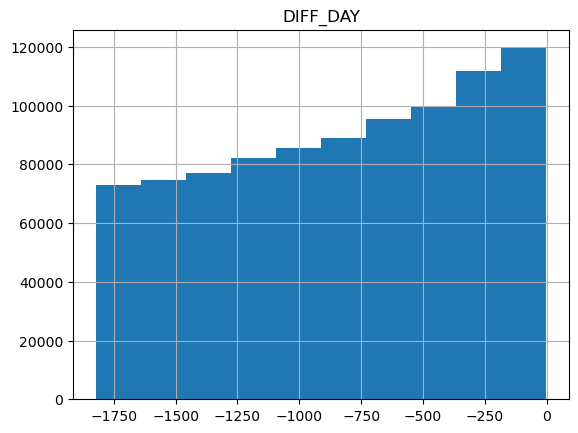

In [ ]:
bdtot.hist()
import plotly.express as px
fig = px.bar(bdtot, barmode = 'stack')
#Ici ce serait pas mal de faire un graphique empilé avec des couleurs selon le type de conso de soins (hospitalière avec un code commençant par PMSI, pharmaceutique avec un code commençant par PHA)

In [19]:
q1 = bdtot['DIFF_DAY'].quantile(0.1)
q2 = bdtot['DIFF_DAY'].quantile(0.2)
q3 = bdtot['DIFF_DAY'].quantile(0.3)
q4 = bdtot['DIFF_DAY'].quantile(0.4)
q5 = bdtot['DIFF_DAY'].quantile(0.5)
q6 = bdtot['DIFF_DAY'].quantile(0.6)
q7 = bdtot['DIFF_DAY'].quantile(0.7)
q8 = bdtot['DIFF_DAY'].quantile(0.8)
q9 = bdtot['DIFF_DAY'].quantile(0.9)

df1 = bdtot[bdtot['DIFF_DAY']<q1] #Premier décile
df2 = bdtot[bdtot['DIFF_DAY']>=q1] 
df2 = df2[df2['DIFF_DAY']<q2] #Deuxième décile
df3 = bdtot[bdtot['DIFF_DAY']>=q2] 
df3 = df3[df3['DIFF_DAY']<q3]
df4 = bdtot[bdtot['DIFF_DAY']>=q3] 
df4 = df4[df4['DIFF_DAY']<q4]
df5 = bdtot[bdtot['DIFF_DAY']>=q4] 
df5 = df5[df5['DIFF_DAY']<q5]
df6 = bdtot[bdtot['DIFF_DAY']>=q5] 
df6 = df6[df6['DIFF_DAY']<q6]
df7 = bdtot[bdtot['DIFF_DAY']>=q6] 
df7 = df7[df7['DIFF_DAY']<q7]
df8 = bdtot[bdtot['DIFF_DAY']>=q7] 
df8 = df8[df8['DIFF_DAY']<q8]
df9 = bdtot[bdtot['DIFF_DAY']>=q8] 
df9 = df9[df9['DIFF_DAY']<q9]
df10 = bdtot[bdtot['DIFF_DAY']>=q9]

In [20]:
listedf = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
diag = []
medic = []
for elem in listedf:
    cdiag = 0
    cmedic = 0
    for i in range(elem.shape[0]):
        if elem['NIVEAU_1'].values[i].startswith('PHA')==True:
            cmedic = cmedic+1
        else:
            cdiag = cdiag+1
    diag.append(cdiag)
    medic.append(cmedic)

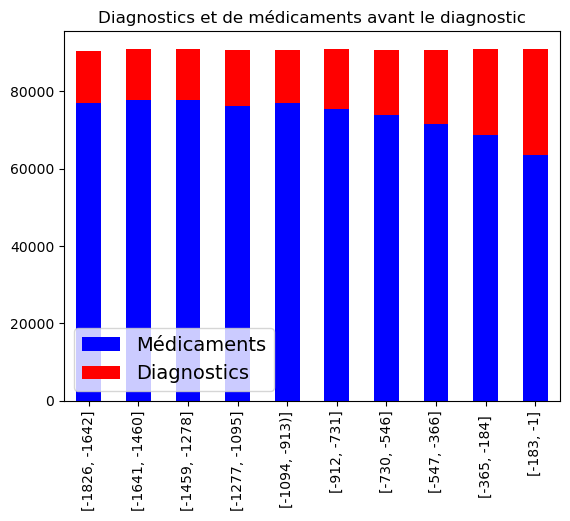

In [23]:
dfbar = pd.DataFrame(dict(Medic=medic, Diagnostics=diag))
dfbar = dfbar.rename(index={0:'[-1826, -1642]',1:'[-1641, -1460]',2:'[-1459, -1278]',3:'[-1277, -1095]',4:'[-1094, -913)]',5:'[-912, -731]',6:'[-730, -546]',7:'[-547, -366]',8:'[-365, -184] ',9:'[-183, -1]'})
ax = dfbar.plot.bar(stacked=True, color=['blue', 'red'])
plt.title("Diagnostics et de médicaments avant le diagnostic")
h,l = ax.get_legend_handles_labels()
ax.legend(h[:3],["Médicaments", "Diagnostics"], loc=3, fontsize=14)
plt.show()

Nous allons donc créer des catégories à partir de ces valeurs.

In [73]:
bdtot_c = bdtot.copy()
bdtot_c['DIFF_DAY'] = pd.cut(bdtot_c['DIFF_DAY'], 10)
bdtot_c['DIFF_DAY'].sample(20)

232456          (-183.3, -1.0]
150992        (-547.9, -365.6]
77337       (-1459.4, -1277.1]
257824        (-730.2, -547.9]
47208     (-1825.823, -1641.7]
156223        (-365.6, -183.3]
106428    (-1825.823, -1641.7]
282200        (-912.5, -730.2]
189277      (-1459.4, -1277.1]
269803    (-1825.823, -1641.7]
101043      (-1641.7, -1459.4]
95274       (-1459.4, -1277.1]
232630        (-730.2, -547.9]
45657         (-730.2, -547.9]
278060      (-1459.4, -1277.1]
209353        (-730.2, -547.9]
59437         (-912.5, -730.2]
288677        (-547.9, -365.6]
261146        (-365.6, -183.3]
15522     (-1825.823, -1641.7]
Name: DIFF_DAY, dtype: category
Categories (10, interval[float64, right]): [(-1825.823, -1641.7] < (-1641.7, -1459.4] < (-1459.4, -1277.1] < (-1277.1, -1094.8] ... (-730.2, -547.9] < (-547.9, -365.6] < (-365.6, -183.3] < (-183.3, -1.0]]

In [12]:
ar = np.array([0, 0]) #Première ligne arbitraire
Nb_Soins = pd.DataFrame(ar) #Conversion de la matrice en DataFrame
Nb_Soins = Nb_Soins.transpose()
Nb_Soins.columns = ['TPS', 'NB_SOIN'] #On nomme les colonnes'''
liste = list(set(list(bdtot_c['DIFF_DAY'])))


 
#On va maintenant chercher à associer à chaque enquêté le nombre de soin reçu.
#Calcul des soins par personnes et création d'une dataframe qui associe au numéro le nombre de soin
for elem in liste:
    c = 0 #Ce sera notre compteur d'itération
    for val in bdtot_c['DIFF_DAY']:
        if elem==val:
            c = c+1
    ar_temp = np.array([elem, c])
    df_temp = pd.DataFrame(ar_temp)
    df_temp = df_temp.transpose()
    df_temp.columns = ['TPS', 'NB_SOIN']
    Nb_Soins = pd.concat([Nb_Soins, df_temp])

Nb_Soins

,TPS,NB_SOIN
0,0,0
0,"(-1459.4, -1277.1]",21103
0,"(-365.6, -183.3]",12679
0,"(-1641.7, -1459.4]",22094
0,"(-547.9, -365.6]",13729
0,"(-183.3, -1.0]",12630
0,"(-1094.8, -912.5]",16882
0,"(-912.5, -730.2]",15924
0,"(-1825.823, -1641.7]",23674
0,"(-1277.1, -1094.8]",20068


In [ ]:
Nb_Soins_c = Nb_Soins.copy()
Nb_Soins_c = Nb_Soins_c[Nb_Soins_c['TPS']!=0] 

Stats desc : âge, CMU, sexe

,Medic,Diagnostics
"[-1826, -1642]",76852,13565
"[-1641, -1460]",77709,13182
"[-1459, -1278]",77610,13307
"[-1277, -1095]",76116,14631
"[-1094, -913)]",76879,13855


## III. Modélisation : Clustering de séries temporelles**

On va appliquer l'algorithme des k-means pour établir des clusters (et donc des profils de patient). Cependant, ayant entre les mains une série temporelle, nous n'allons pas utiliser une distance euclidienne classique mais la "Dynamic Time Warping Distance" qui est plus adaptée au type de données qu'on traite. En effet, la distance euclidienne ne permet pas d'absorber l'aspect temporel de la data.

Cependant, pour dessiner les profils, on va accoler les informations de la table de population des individus sur la base de soins totale. 

*Génération de la base de données du clustering*

In [ ]:
df_cl = pd.merge(bdtot, Table_Pop, on =['NUM_ENQ'])
df_cl

*Choisir le bon nombre de clusters*

Nous allons estimer cela en ayant recours à la méthode "silhouette coefficient". Ce coefficient calcule à quel point les points d'un même cluster sont proches entre eux et à quel point ces points sont bien éloignés des autres clusters. On va donc le calculer pour un certain nombre de cluster afin de déterminer le nombre idéal à générer : ce nombre sera celui qui maximise le coefficient. 

Il faudra réfléchir à comment on procède pour mettre de la distance entre des attributs qualitatifs.

In [ ]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = TimeSeriesKMeans(n_clusters=k,metric="dtw", max_iter=10)
    kmeans.fit(df_cl)
    score = silhouette_score(df_cl, kmeans.labels_)
    silhouette_coefficients.append(score)

nb_ideal = max(silhouette_coefficients)
    

*k-means*

In [ ]:
model = TimeSeriesKMeans(n_clusters=nb_ideal, metric="dtw", max_iter=10)
model.fit(df_cl)